# Question 02 : Perform Grid Search For Hyper-Parameter Tuning

In [41]:
import numpy as np
import pandas as pd
import matplotlib . pyplot as plt
from sklearn . datasets import fetch_openml
from sklearn . linear_model import LogisticRegression
from sklearn . model_selection import GridSearchCV , train_test_split
from sklearn . pipeline import Pipeline
from sklearn . preprocessing import StandardScaler
from sklearn . metrics import accuracy_score
from sklearn . utils import check_random_state

# data loading
train_samples = 500
X, y = fetch_openml ("mnist_784", version =1, return_X_y =True ,as_frame = False )
random_state = check_random_state (0)
permutation = random_state . permutation (X. shape [0])
X = X[ permutation ]
y = y[ permutation ]
X = X. reshape ((X. shape [0] , -1))
X_train , X_test , y_train , y_test = train_test_split (X, y, train_size = train_samples , test_size =100)

C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [42]:
lasso_logistic_pipeline = Pipeline([
('scaler', StandardScaler()), # Standardize feature
('lasso_logistic', LogisticRegression(penalty='l1', solver='liblinear', multi_class='auto'))])
# Define the parameter grid for hyperparameter tuning
param_grid = {'lasso_logistic__C': np.logspace(-2, 2, 9)}

grid_search = GridSearchCV(lasso_logistic_pipeline, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
# Get the best value of C
best_C = grid_search.best_params_['lasso_logistic__C']
print('Best C:', best_C)

# Predict on the test set
y_pred = grid_search.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Best C: 1.0
Test Accuracy: 0.77


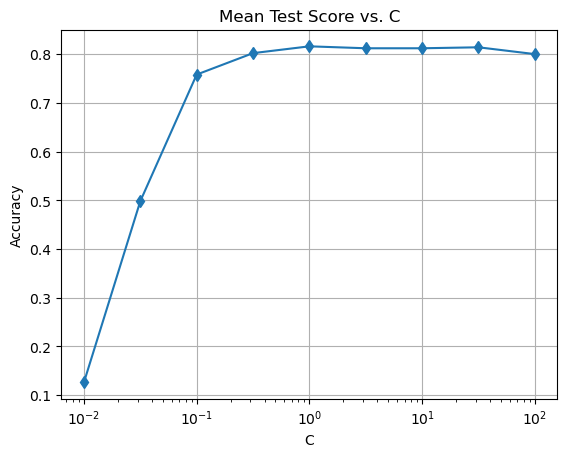

In [45]:
# Extract the hyperparameter values and corresponding mean test scores
C_values = np.logspace(-2, 2, 9)
mean_test_scores = grid_search.cv_results_['mean_test_score']
# Plot the mean test score against C
plt.semilogx(C_values, mean_test_scores, marker='d')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Mean Test Score vs. C')
plt.grid(True)
plt.show()

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,f1_score
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Make predictions on the test set
y_pred = grid_search.predict(X_test)
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
# Calculate confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

# Print the metrics
print('Accuracy:', accuracy)


Accuracy: 0.77


In [47]:
# Calculate precision
precision = precision_score(y_test, y_pred, average='macro')
print('Precision:', precision)

Precision: 0.7739468864468864


In [50]:
# Calculate recall
recall = recall_score(y_test, y_pred, average='macro')
print('Recall:', recall)

Recall: 0.7826190476190475


In [51]:
f1 = f1_score(y_test, y_pred, average='macro')
print('F1 Score:', f1)

F1 Score: 0.770796849984493


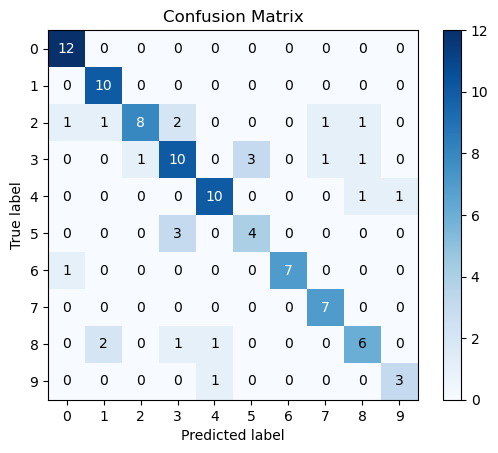

In [52]:
# Plot the confusion matrix 
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()